# Lotto Probability

Study of the probability of win on the 6/49 lotto on many cases

In [118]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [21]:
# math functions
def factorial(n):
    produto = 1
    while n > 1:
        produto *= n
        n -= 1
    return produto

def combinations(n, k):
    produto = 1
    count = 0
    while count < k:
        produto *= n
        n -=1
        count += 1
    return int(produto/factorial(k)) 

In [186]:
# probability function
def multi_ticket_probability(n):
    # n equals the number of unique tickets
    if n > 13983816 or n < 0:
        raise Exception('number out of bounds')
    possibleOutcome = combinations(49, 6)
    text = "With {} tickets your probabiltiy to win is these cases".format(n)
    text += '\n\n6/6: {} in {} or {}%'.format( n, possibleOutcome, n/possibleOutcome*100)
    text += '\n5/6: {} in {} or {}%'.format( n, int(n*possibleOutcome/(combinations(6,5)*combinations(43, 6 - 5))), 100/int(n*possibleOutcome/(combinations(6,5)*combinations(43, 6 - 5))))
    text += '\n4/6: {} in {} or {}%'.format( n, int(n*possibleOutcome/(combinations(6,4)*combinations(43, 6 - 4))), 100/int(n*possibleOutcome/(combinations(6,4)*combinations(43, 6 - 4))))
    text += '\n3/6: {} in {} or {}%'.format( n, int(n*possibleOutcome/(combinations(6,3)*combinations(43, 6 - 3))), 100/int(n*possibleOutcome/(combinations(6,3)*combinations(43, 6 - 3))))    
    print(text)

In [187]:
multi_ticket_probability(1)

With 1 tickets your probabiltiy to win is these cases

6/6: 1 in 13983816 or 7.151123842018516e-06%
5/6: 1 in 54200 or 0.0018450184501845018%
4/6: 1 in 1032 or 0.09689922480620156%
3/6: 1 in 56 or 1.7857142857142858%


Importing data of results of the lotto

In [48]:
results = pd.read_csv('649.csv')
results.shape

(3665, 11)

In [49]:
results.head()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


In [96]:
winNumbers = results.iloc[:, 3:10].apply(lambda x: [x[1], x[2], x[3], x[4], x[5], x[6]], axis = 1)

In [109]:
frequence = dict()
for sequence in winNumbers:
    for number in sequence:
        if number in frequence.keys():
            frequence[number]+= 1
        else:
            frequence[number] = 1

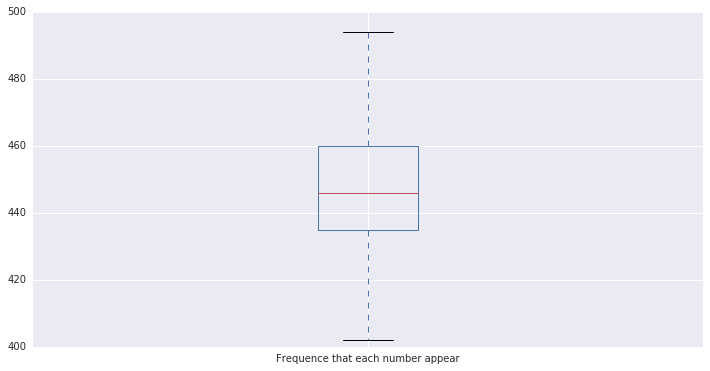

In [132]:
plt.figure(figsize = (12, 6))
pd.Series(frequence, name = 'Frequence that each number appear').plot.box()
plt.show()

As expected the average frequence tthat a number appers is around of 450 times that is the probability of 6 chances of 49 times 3665. The frequences do not diverge from this average more than 50 points.

In [139]:
def check_historical_occurence(x):
    for number in x:
        print('{} have appears {} times'.format(number, frequence[number]))

In [141]:
check_historical_occurence([1, 2, 10, 4, 5, 6])

1 have appears 423 times
2 have appears 437 times
10 have appears 429 times
4 have appears 453 times
5 have appears 428 times
6 have appears 429 times
